In [1]:
#Importing Lib
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings ('ignore')

In [2]:
#loading data set 
df = pd.read_csv('hotel_bookings 2.csv')

In [3]:
#EDA and Data Cleaning 
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [4]:
df.shape

(119390, 32)

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [9]:
#describe fxn used for numerical coloumn but we can use include parameter if we use object in include we will get summary stats of the data   
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [10]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('_'* 60)

hotel
['Resort Hotel' 'City Hotel']
____________________________________________________________
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
____________________________________________________________
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
____________________________________________________________
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'C

In [11]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [12]:
df.drop(['company','agent'],axis=1,inplace = True)
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [14]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [15]:
df=df[df['adr']<5000]

In [16]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


In [17]:
#Data Analysis & Visualisations

In [18]:
cancelled_perc=df['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)      

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


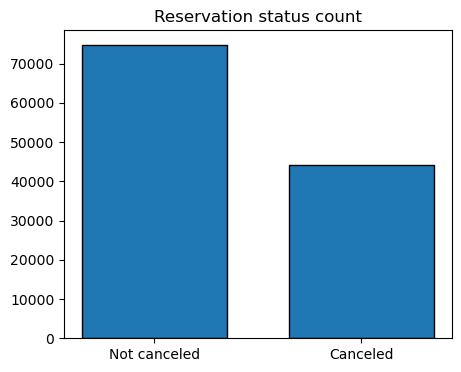

In [19]:
#plt.figure(figsize=(5,4)): This line creates a new figure with a size of 5 inches by 4 inches. This is specifying the dimensions of the plot in which the chart will be plotted.

#plt.title('Reservation status count'): This line sets the title of the plot to "Reservation status count".

#plt.bar(['Not canceled','Canceled'],df['is_canceled'].value_counts(),edgecolor ='k',width=0.7): This line creates a bar chart using the bar() method of the plt object. The first argument ['Not canceled','Canceled'] specifies the labels of the two bars. The second argument df['is_canceled'].value_counts() is the data used to create the bars, which are the counts of the two values of the is_canceled column in the DataFrame df. The edgecolor ='k' argument sets the color of the edges of the bars to black. The width=0.7 argument sets the width of the bars.

#plt.show(): This line displays the plot.

plt.figure(figsize=(5,4))
plt.title('Reservation status count')
plt.bar(['Not canceled','Canceled'],df['is_canceled'].value_counts(),edgecolor ='k',width=0.7)
plt.show() 

In [20]:
#plt.figure(figsize=(8,4)): creates a new figure with a specific size of 8 inches in width and 4 inches in height.
#ax1=sns.countplot(x='hotel',hue = 'is_canceled',data = df,palette = "Blues"): creates a countplot using the sns.countplot() function, where x='hotel' specifies that we want to count the number of reservations for each hotel, and hue = 'is_canceled' tells seaborn to create bars for each cancellation status. data = df specifies the dataset to use, and palette = "Blues" specifies the color palette to use.
#legend_labels,_=ax1.get_legend_handles_labels(): gets the handles and labels for the legend of the countplot.
#ax1.legend(bbox_to_anchor=(1,1)): adds a legend to the countplot at the top-right corner, outside of the plot area.
#plt.title('Reservation status in different hotels',size=20): adds a title to the plot.
#plt.xlabel('hotel'): adds a label to the x-axis.
#plt.ylabel('number of reservations'): adds a label to the y-axis.
#plt.legend(['not canceled','canceled']): adds a legend to the plot with the labels "not canceled" and "canceled" for each bar.
#plt.show(): shows the plot.

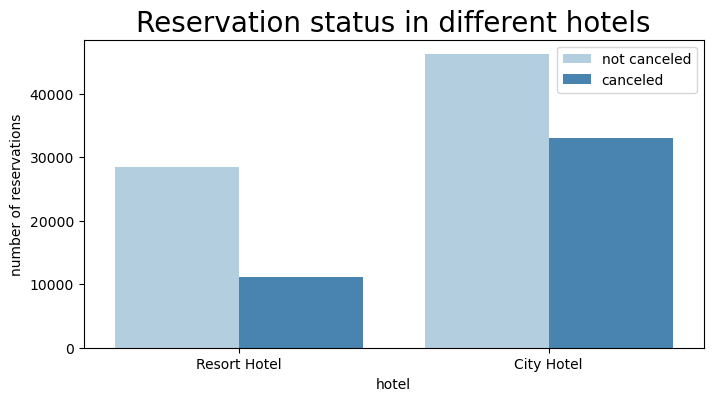

In [21]:
plt.figure(figsize=(8,4))
ax1=sns.countplot(x='hotel',hue = 'is_canceled',data = df,palette = "Blues")
legend_labels,_=ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status in different hotels',size=20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.legend(['not canceled','canceled'])
plt.show()

In [22]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [23]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [24]:
#will see the effect of price on Resort Hotel & City Hotel 
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

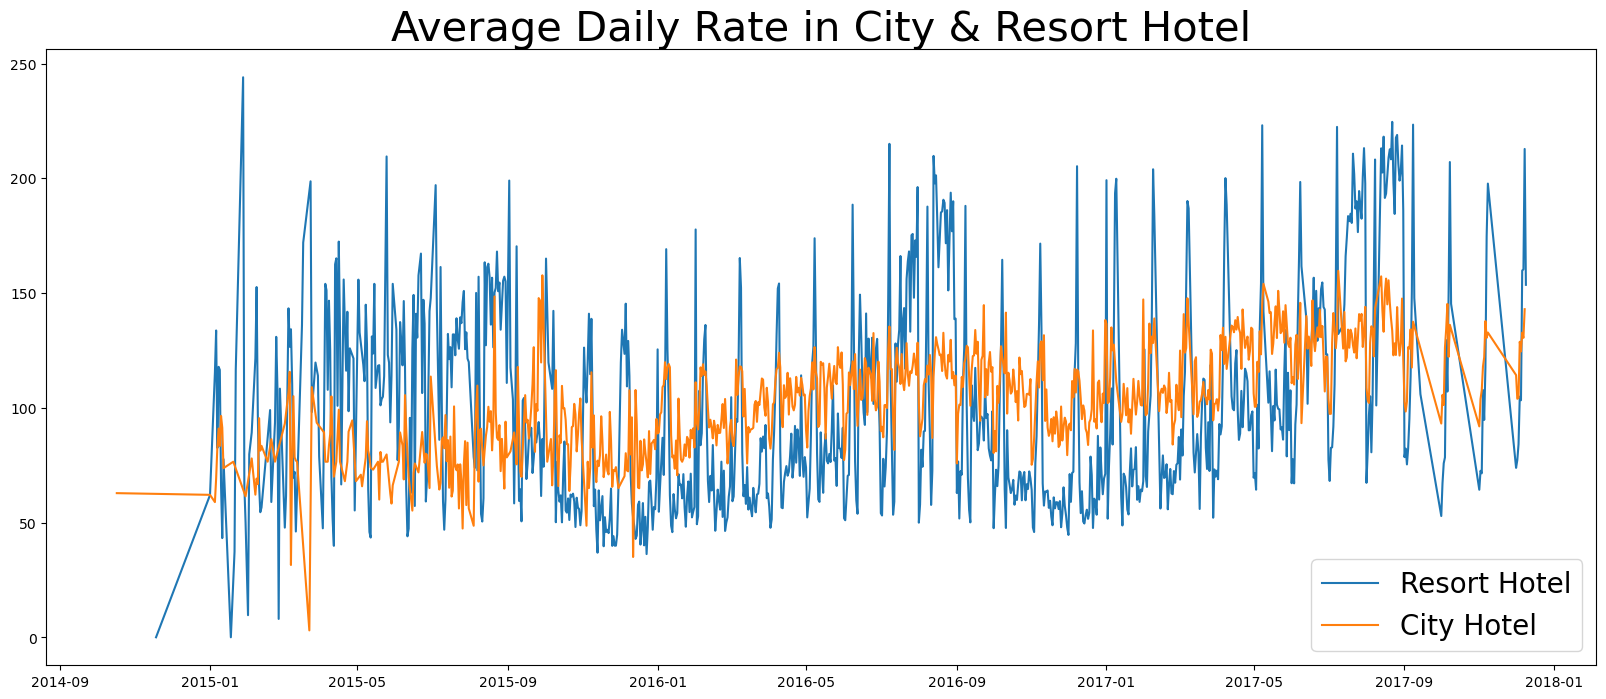

In [25]:
plt.figure(figsize=(20,8))
plt.title('Average Daily Rate in City & Resort Hotel',fontsize=30)
plt.plot(resort_hotel.index,resort_hotel['adr'],label='Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'],label='City Hotel')
plt.legend(fontsize=20)
plt.show()

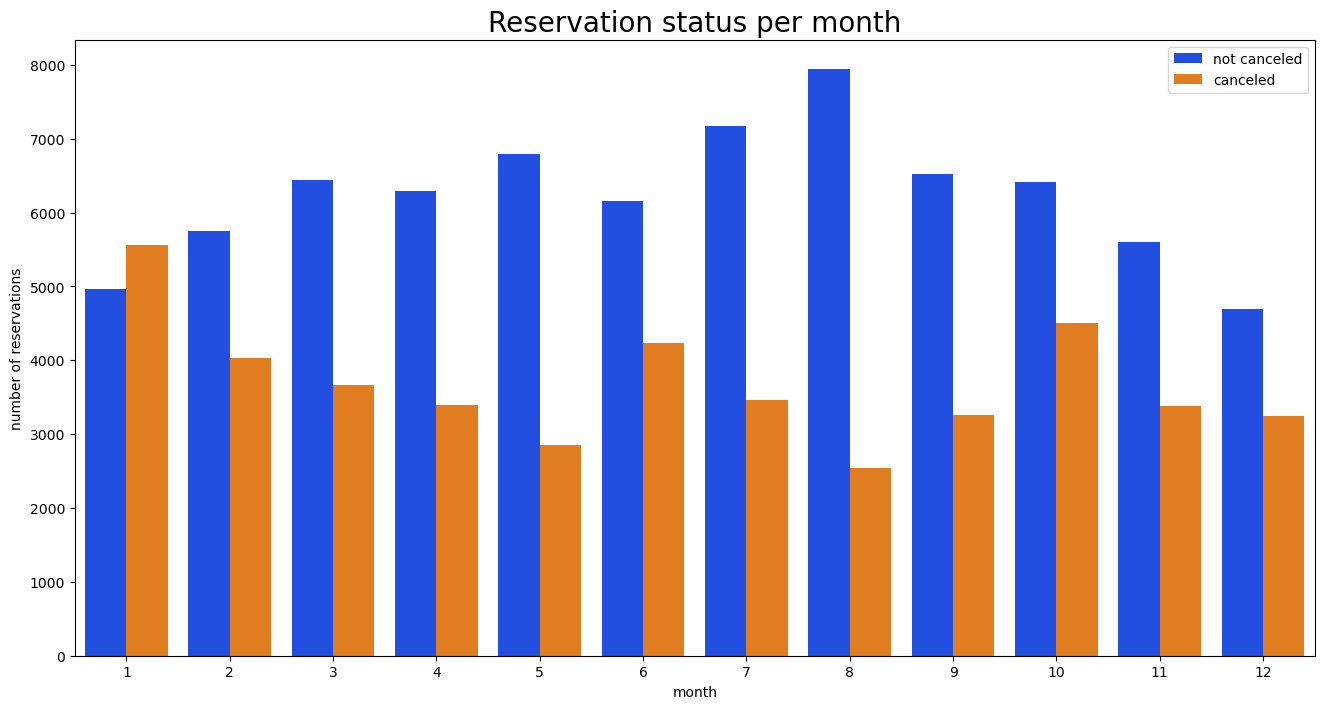

In [26]:
df['month']= df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
ax1 = sns.countplot(x='month',hue = 'is_canceled',data = df,palette = 'bright')
legend_labels,_=ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status per month', size =20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled','canceled'])
plt.show()

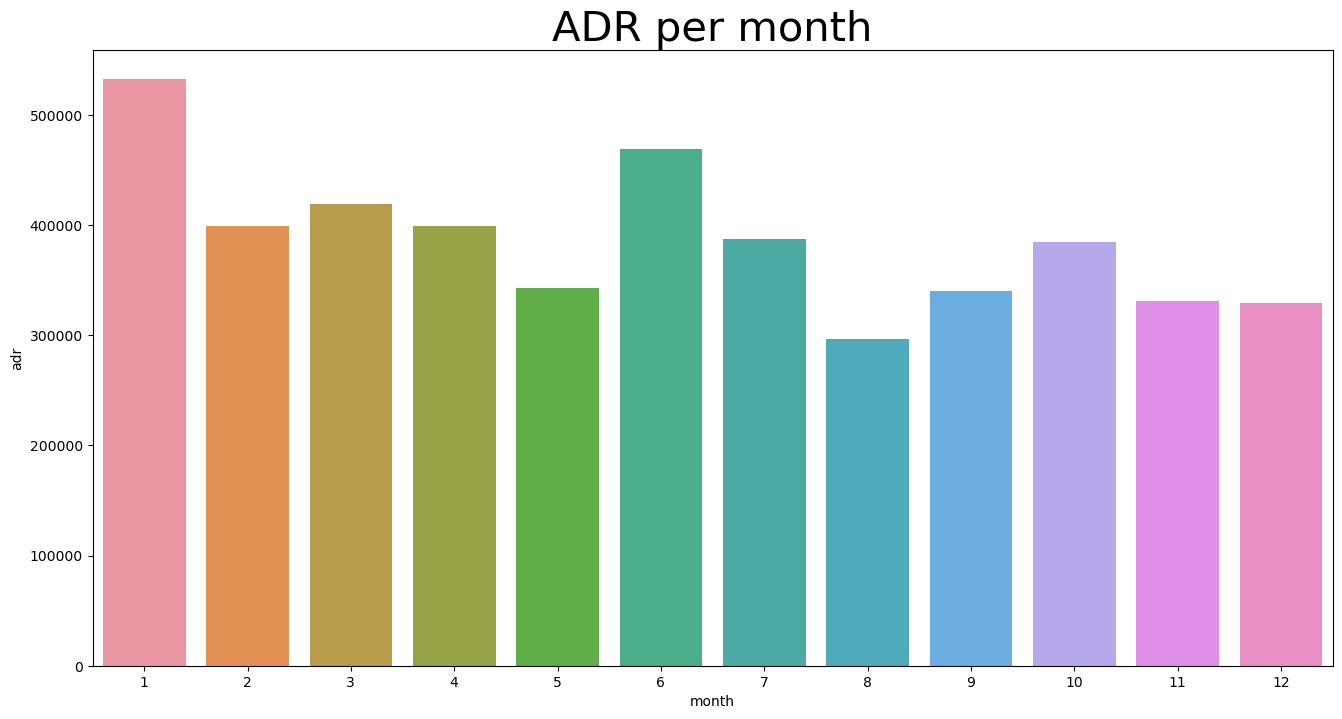

In [27]:
plt.figure(figsize=(16,8))
plt.title('ADR per month',fontsize = 30)
sns.barplot('month','adr', data = df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.show()

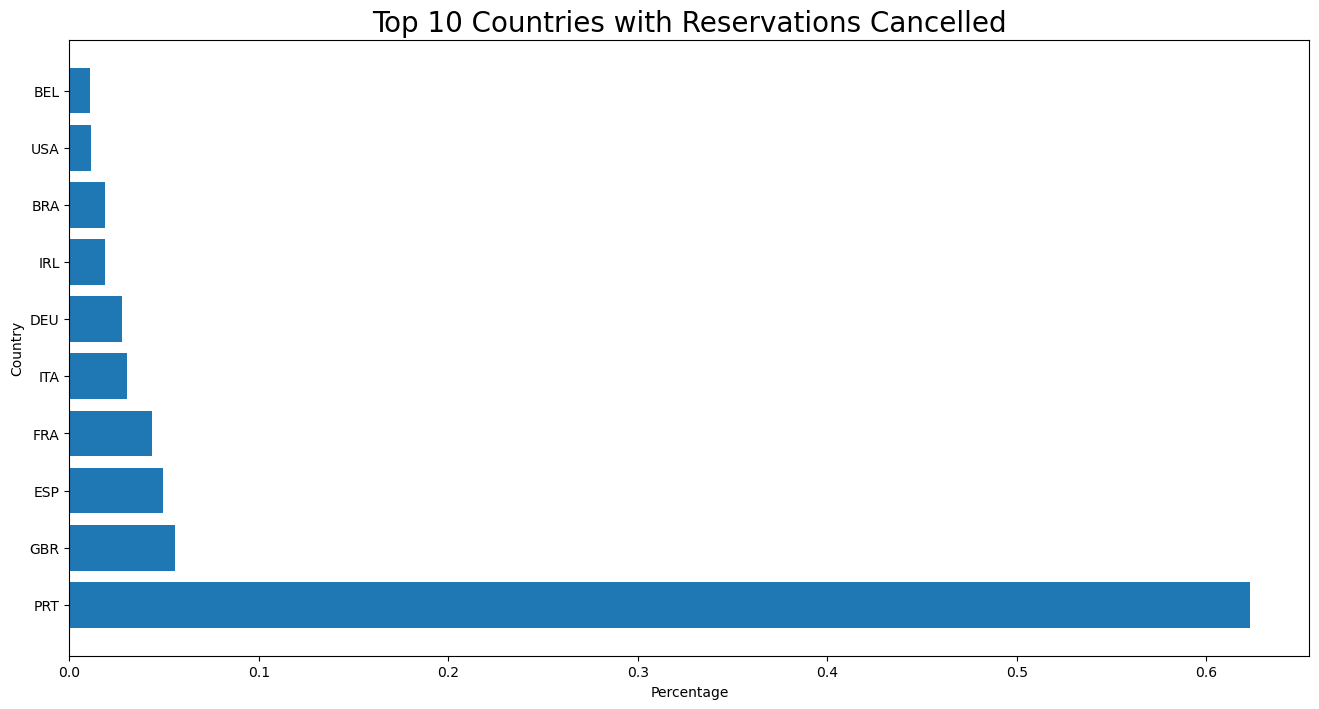

In [28]:
cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]

plt.figure(figsize=(16, 8))
plt.barh(top_10_country.index, top_10_country.values / len(cancelled_data))
plt.title('Top 10 Countries with Reservations Cancelled', size=20)
plt.xlabel('Percentage')
plt.ylabel('Country')
plt.show()

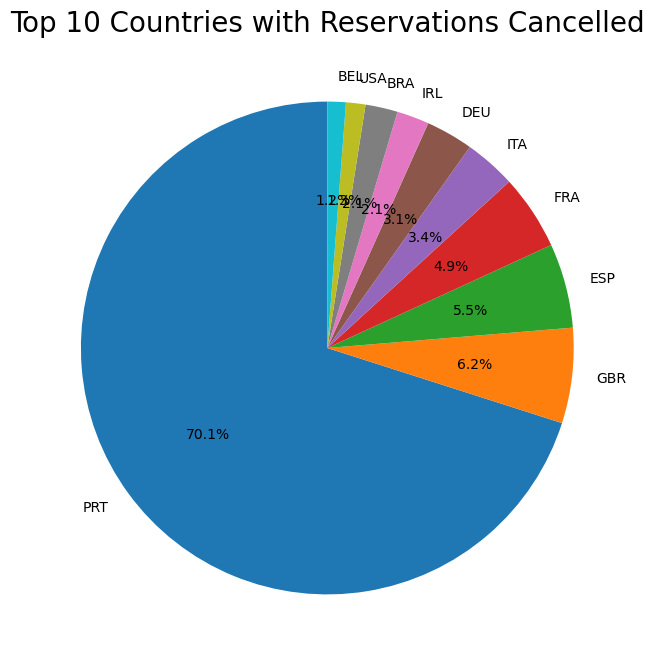

In [29]:
cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]

plt.figure(figsize=(8, 8))
plt.pie(top_10_country.values, labels=top_10_country.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Countries with Reservations Cancelled', size=20)
plt.show()

In [30]:
df['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [31]:
# Create a dataframe with the given data
data = {'Category': ['Online TA', 'Offline TA/TO', 'Groups', 'Direct', 'Corporate', 'Complementary', 'Aviation'],
        'Bookings': [56402, 24159, 19806, 12448, 5111, 734, 237]}
df = pd.DataFrame(data)

# Calculate the total number of bookings
total_bookings = df['Bookings'].sum()

# Calculate the percentage of each category in the total bookings
df['Percentage'] = (df['Bookings'] / total_bookings) * 100

# Display the dataframe
print(df)

        Category  Bookings  Percentage
0      Online TA     56402   47.437698
1  Offline TA/TO     24159   20.319268
2         Groups     19806   16.658116
3         Direct     12448   10.469566
4      Corporate      5111    4.298679
5  Complementary       734    0.617341
6       Aviation       237    0.199332


In [32]:
cancelled_data['market_segment'].value_counts()

Online TA        20738
Groups           12097
Offline TA/TO     8277
Direct            1920
Corporate          978
Complementary       90
Aviation            52
Name: market_segment, dtype: int64

Time period 1:
        Category  Bookings  Percentage
0      Online TA     20738   46.969560
1         Groups     12097   27.398532
2  Offline TA/TO      8277   18.746603
3         Direct      1920    4.348614
4      Corporate       978    2.215075
5  Complementary        90    0.203841
6       Aviation        52    0.117775

Time period 2:
        Category  Bookings  Percentage
0      Online TA     56402   47.437698
1         Groups     19806   16.658116
2  Offline TA/TO     24159   20.319268
3         Direct     12448   10.469566
4      Corporate      5111    4.298679
5  Complementary       734    0.617341
6       Aviation       237    0.199332


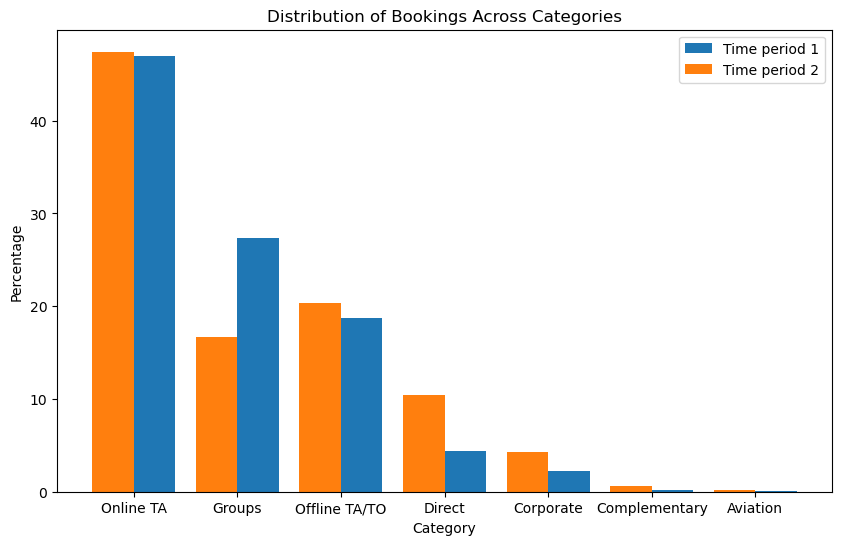

In [33]:
# Create dataframes with the given data for two different time periods
data1 = {'Category': ['Online TA', 'Groups', 'Offline TA/TO', 'Direct', 'Corporate', 'Complementary', 'Aviation'],
        'Bookings': [20738, 12097, 8277, 1920, 978, 90, 52]}
df1 = pd.DataFrame(data1)
data2 = {'Category': ['Online TA', 'Groups', 'Offline TA/TO', 'Direct', 'Corporate', 'Complementary', 'Aviation'],
        'Bookings': [56402, 19806, 24159, 12448, 5111, 734, 237]}
df2 = pd.DataFrame(data2)

# Calculate the total number of bookings for each time period
total_bookings1 = df1['Bookings'].sum()
total_bookings2 = df2['Bookings'].sum()

# Calculate the percentage of each category in the total bookings for each time period
df1['Percentage'] = (df1['Bookings'] / total_bookings1) * 100
df2['Percentage'] = (df2['Bookings'] / total_bookings2) * 100

# Display the dataframes
print('Time period 1:')
print(df1)
print('\nTime period 2:')
print(df2)

# Create a bar chart to compare the distribution of bookings across categories between the two time periods
plt.figure(figsize=(10, 6))
plt.bar(df1['Category'], df1['Percentage'], width=0.4, align='edge', label='Time period 1')
plt.bar(df2['Category'], df2['Percentage'], width=-0.4, align='edge', label='Time period 2')
plt.legend()
plt.title('Distribution of Bookings Across Categories')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.show()